In [1]:
from visualizer.data import EventClusterProcessor
from visualizer.plots import EventClusterPlot
import os
import glob
import numpy as np

In [2]:
"""
USER-DEFINED VARIABLES
"""

fname_signal = 'VJ_OFCVTA_7_260_D6_neuropil_corrected_signals_15_50_beta_0.8.npy'   # name of your npy or csv file that contains activity signals
fname_events = 'event_times_VJ_OFCVTA_7_260_D6_trained.csv' # name of your pickle or csv file that contains behavioral event times (in seconds)
# fdir signifies to the root path of the data. Currently, the abspath phrase points to sample data from the repo.
# To specify a path that is on your local computer, use this string format: r'your_root_path', where you should copy/paste
# your path between the single quotes (important to keep the r to render as a complete raw string). See example below:
# r'C:\Users\stuberadmin\Documents\GitHub\NAPE_imaging_postprocess\napeca_post\sample_data' 
fdir = os.path.abspath('./sample_data/VJ_OFCVTA_7_260_D6') # for an explicit path, eg. r'C:\2pData\Vijay data\VJ_OFCVTA_7_D8_trained'
fs = 5 # sampling rate of activity data

signals_content = glob.glob(os.path.join(fdir, fname_signal))[0]
events_content = glob.glob(os.path.join(fdir, fname_events))[0]

# trial extraction info
trial_start_end = [-2, 8] # trial [start, end] times (in seconds); centered on event onset
baseline_end = -0.2 # baseline epoch end time (in seconds) for performing baseline normalization; I set this to -0.2 to be safe I'm not grabbing a sample that includes the event
event_sort_analysis_win = [0, 5] # time window (in seconds)

pca_num_pc_method = 0 # 0 for bend in scree plot, 1 for num PCs that account for 90% variance

# variables for clustering
max_n_clusters = 10 # from Vijay: Maximum number of clusters expected. This should be based on the number of functional neuron groups you expect + ~3. In your data, 
# might be worth increasing this, but it will take more time to run.

'''In spectral clustering: get n nearest neighbors for each data point and create connectivity graph (affinity matrix)'''
possible_n_nearest_neighbors = np.arange(1, 10) #np.array([3,5,10]) # This should be selected for each dataset
# appropriately. When 4813 neurons are present, the above number of nearest neighbors ([30,40,30,50,60]) provides a good sweep of the
# parameter space. But it will need to be changed for other data.

# optional arguments
selected_conditions = None # set to a list of strings if you want to filter specific conditions to analyze; eg. ['plus', 'minus']
flag_plot_reward_line = False # if there's a second event that happens after the main event, it can be indicated if set to True; timing is dictated by the next variables below
second_event_seconds = 1 # time in seconds
heatmap_cmap_scaling = 1 # set to lower value if colormap range is too large

# set to True if the data you are loading in already has data from different conditions concatenated together
# do not set to True if data come directly from suite2p or sima/napeca preprocessing!
group_data = False
group_data_conditions = ['cs_plus', 'cs_minus']
sortwindow = [15, 100]

Number of PCs = 61


c:\Users\Eesha\Documents\GitHub\testsima\Lib\site-packages\scikit_learn-1.3.0-py3.11-win-amd64.egg\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\Eesha\Documents\GitHub\testsima\Lib\site-packages\scikit_learn-1.3.0-py3.11-win-amd64.egg\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Eesha\Documents\GitHub\testsima\Lib\site-packages\scikit_learn-1.3.0-py3.11-win-amd64.egg\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
c:\Users\Eesha\Documents\GitHub\testsima\Lib\site-packages\scikit_learn-1.3.0-py3.11-win-amd64.egg\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_

(9, 9, 2)
Done with model fitting
3 6 3 Spectral
Number of clusters = 3, average silhouette = 0.5332365191056838.3f


C:\Users\Eesha\AppData\Local\Temp\ipykernel_2140\4112858339.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Eesha\AppData\Local\Temp\ipykernel_2140\4112858339.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Number of PCs to keep = 3


c:\Users\Eesha\Documents\GitHub\testsima\Lib\site-packages\visualizer\plots\plots.py:804: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Eesha\AppData\Local\Temp\ipykernel_2140\4112858339.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Eesha\AppData\Local\Temp\ipykernel_2140\4112858339.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\Eesha\Documents\GitHub\testsima\Lib\site-packages\visualizer\plots\plots.py:865: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="variable", y="value",data = pd.DataFrame(temp[sortresponse]).rename(columns=self.data_processer.tvec_convert_dict).melt(),
c:\Users\Eesha\Documents\GitHub\testsima\Lib\site-packages\visualizer\plots\plots.py:86

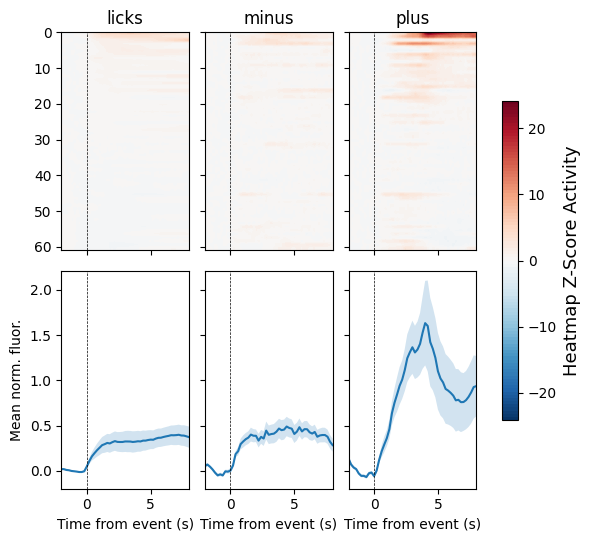

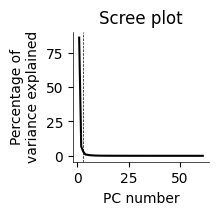

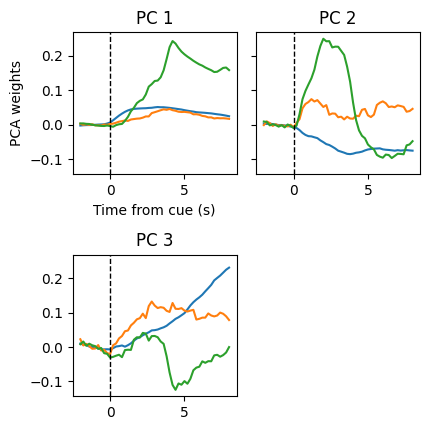

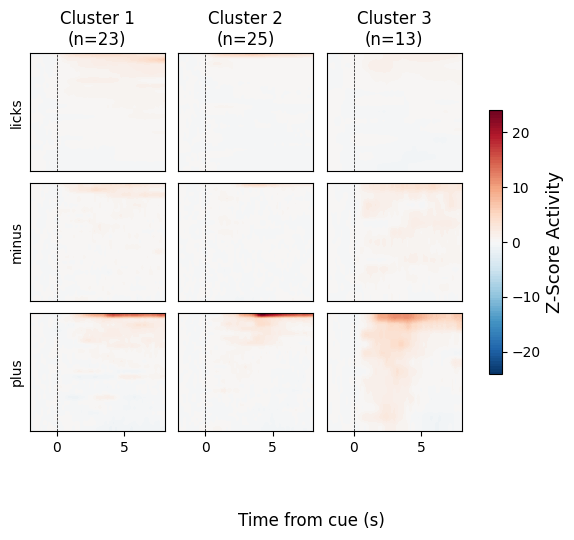

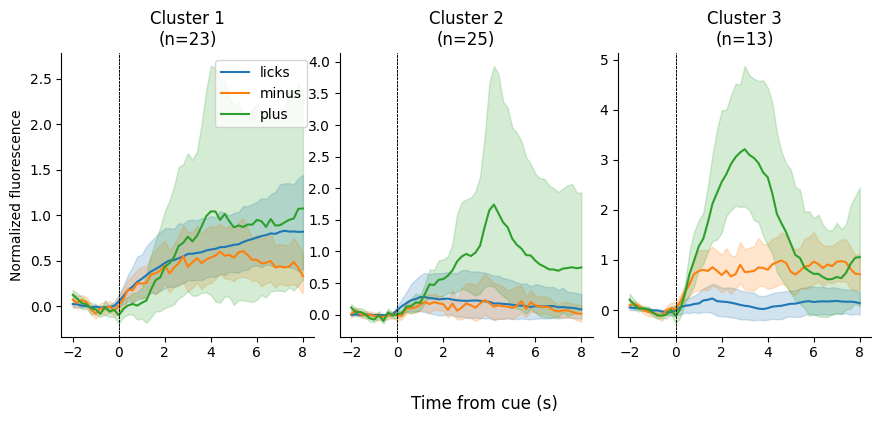

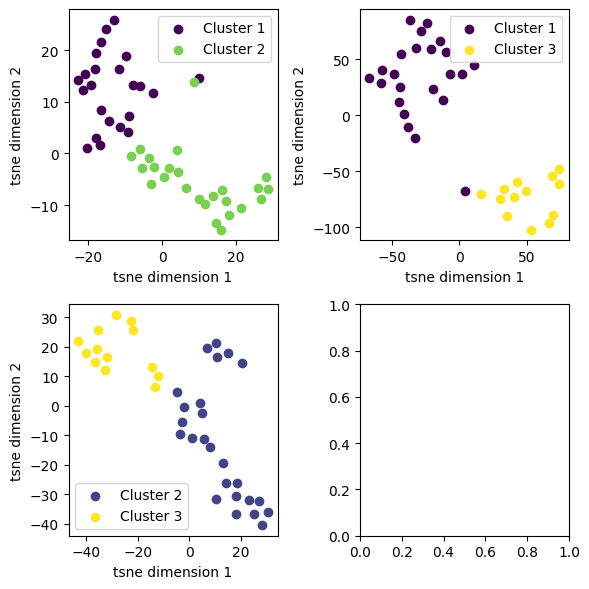

In [3]:
def main():
    data_processor = EventClusterProcessor(signals_content, events_content, fs, trial_start_end, baseline_end, event_sort_analysis_win, pca_num_pc_method, max_n_clusters, possible_n_nearest_neighbors, selected_conditions, flag_plot_reward_line, second_event_seconds, heatmap_cmap_scaling, group_data, group_data_conditions, sortwindow)
    data_processor.generate_all_data()

    data_plotter = EventClusterPlot(data_processor)
    fig = data_plotter.generate_heatmap_zscore()
    fig.show()

    fig = data_plotter.generate_scree_plot(package="plotly")
    fig.show()

    fig = data_plotter.generate_pca_plot()
    fig.show()

    fig = data_plotter.generate_cluster_condition_plots()
    fig.show()

    fig = data_plotter.generate_fluorescent_graph()
    fig.show()

    fig = data_plotter.generate_cluster_plot()
    fig.show()

if __name__ == "__main__":
    main()